In [1]:
from sympy import *

In [2]:
init_printing(use_unicode=True)

In [18]:
rho_0, rho_1, r, D, b, N = symbols('rho_0, rho_1, r, D, b, N', positive=True)

In [4]:
P10, P11, P00, P01 = symbols('P10, P11, P00, P01')

In [5]:
ds10, ds01 = symbols('ds10, ds01')

In [19]:
n, nr, ng = symbols('n, nr, ng', positive=True)

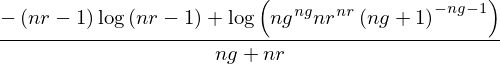

In [21]:
ds01 = 1 / (nr + ng) * (nr * log(nr) - (nr-1) * log(nr-1) + ng * log(ng) - (ng+1) * log(ng+1) )
simplify(ds01)

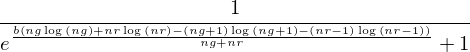

In [15]:
P01 = 1 / (1 + exp(b * ds01)) 
simplify(P01)

In [5]:
f = r * rho_0 * (1 - rho_0) + (rho_1 - rho_0) * (0.5 + b / (8 * N) * (rho_1 - rho_0) / (rho_1 * rho_0))

In [7]:
f_0 = simplify(diff(f, rho_0))

In [8]:
f_0

-2*r*rho_0 + r - 0.5 + b/(8*N*rho_1) - b*rho_1/(8*N*rho_0**2)

In [9]:
S = 0.5 + b /(8 * N) * (rho_1 - rho_0) / (rho_1 * rho_0)

In [11]:
simplify(rho_1 * (0.5 + b / 8 * (rho_0 - rho_1) / (rho_0 * rho_1)) - rho_0 * (0.5 - b / 8 * (rho_0 - rho_1) / (rho_0 * rho_1)))

b*rho_0/(8*rho_1) - b*rho_1/(8*rho_0) - 0.5*rho_0 + 0.5*rho_1

In [12]:
rho_1 * (0.5 + b / 8 * (rho_0 - rho_1) / (rho_0 * rho_1)) - rho_0 * (0.5 - b / 8 * (rho_0 - rho_1) / (rho_0 * rho_1))

-rho_0*(-b*(rho_0 - rho_1)/(8*rho_0*rho_1) + 0.5) + rho_1*(b*(rho_0 - rho_1)/(8*rho_0*rho_1) + 0.5)

In [93]:
f = 0.5 * (rho_1 - rho_0) + b * (rho_0 - rho_1) / (rho_0 * rho_1) #+ r * rho_0 * (1 - rho_0 - rho_1)

In [94]:
g = 0.5 * (rho_0 - rho_1) + b * (rho_1 - rho_0) / (rho_0 * rho_1)

In [95]:
steadystates = solve([f, g], [rho_0, rho_1])

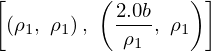

In [96]:
steadystates

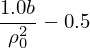

In [97]:
df = simplify(diff(f, rho_0))
df

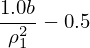

In [98]:
dg = simplify(diff(g, rho_1))
dg

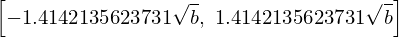

In [102]:
solve(df, rho_0)

In [39]:
from sympy.plotting.plot import plot3d, plot

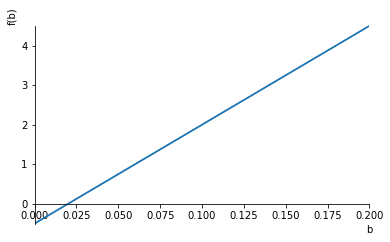

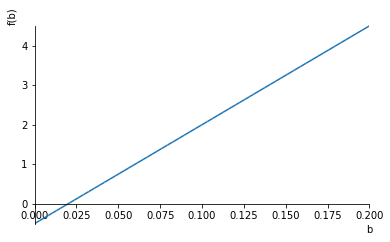

In [78]:
for i in range(len(steadystates)):
    r0 = 0.2
    plot(df.subs([(rho_0, steadystates[i][0]), (rho_1, r0)]),
         dg.subs([(rho_0, steadystates[i][0]), (rho_1, r0)]),
         (b, 0, 0.2))
    
#plot(steadystates[1][0], (b, 0, 0.2))

In [4]:
a, n_r, n_g = symbols('a n_r n_g')

In [39]:
f = 1 / 2 * (log(1 + n_r) + log(1 - n_g))
f

In [40]:
f.series(n_g, 0, 3)

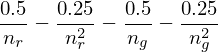

In [31]:
f = 1 / 2 * (-1 / n_g - 0.5 / n_g**2 + 1 / n_r - 0.5 / n_r**2)
f

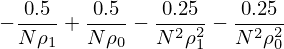

In [32]:
simplify(f.subs([(n_g, N * rho_1), (n_r, N * rho_0)]))

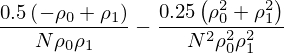

In [33]:
f = 0.5 / N * (rho_1 - rho_0) / (rho_1 * rho_0) - 0.25 / N**2 * (rho_0**2 + rho_1**2) / (rho_0**2 * rho_1**2)
f

In [72]:
P, P1, P2 = symbols('P P1 P2')

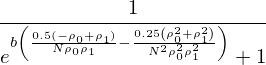

In [36]:
P = 1 / (1 + exp(b * f))
P

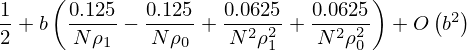

In [37]:
P.series(b, 0, 2)

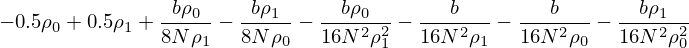

In [49]:
simplify(rho_1 * (0.5 + b/(8 * N) * (rho_0 - rho_1) / rho_1 / rho_0 - b / (16*N**2) * (rho_0**2 + rho_1**2) / (rho_0**2 * rho_1**2)) - rho_0 * (0.5 - b / (8 * N) * (rho_0 - rho_1) / rho_0 / rho_1 + b / (16*N**2)* (rho_0**2 + rho_1**2) / (rho_0**2 * rho_1**2)))

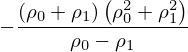

In [52]:
factor((rho_0**3 + rho_1 * rho_0**2 + rho_1**2 * rho_0 + rho_1**3)/(rho_1 - rho_0))

In [51]:
factor(rho_0**2 - rho_1**2)

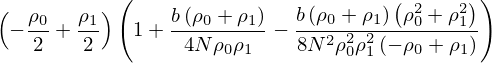

In [56]:
f = (rho_1 - rho_0) / 2 * (1 + b / (4 * N) * (rho_0 + rho_1) / rho_0 / rho_1 - b / 8 / N**2 * (rho_1 + rho_0) / (rho_1 - rho_0) * (rho_0**2 + rho_1**2) / rho_1**2 / rho_0**2)
f

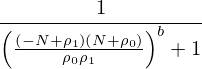

In [90]:
P = 1 / (1 + ((rho_0 + N) * (rho_1 - N) / rho_0 / rho_1 )**b)
P

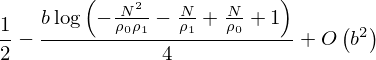

In [89]:
P.series(b, 0, 2)

In [74]:
P2 = 1 / (1 + ((rho_1 + N) * (rho_0 - N) / rho_0 / rho_1 )**b)

In [82]:
solve(rho_1 * P - rho_0 * P2)

NotImplementedError: No algorithms are implemented to solve equation -rho_0/(((-N + rho_0)*(N + rho_1)/(rho_0*rho_1))**b + 1) + rho_1/(((-N + rho_1)*(N + rho_0)/(rho_0*rho_1))**b + 1)